In [337]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [2]:
fn = 'sorghum-and-maize-segmentation-classifications.csv'

In [3]:
df = pd.read_csv(fn)
df_maize = df[df['workflow_name'] == 'Maize Segmentation']
df_maize = df_maize.reset_index(drop=True)

In [63]:
def func1(x):
    y = json.loads(x)
    if y[0]['value']=='Valid - yes tassel' or y[0]['value']=='Valid - yes tassel/ear':
        return True
    else:
        return False

In [109]:
df_maize_valid = df_maize[df_maize['annotations'].apply(func1)].reset_index(drop=True)
df_maize_valid = df_maize_valid[['annotations', 'subject_data']]

In [232]:
npy_dir = Path('/Users/cmiao/Projects/HyperSegmentation/Numpy_81')

In [246]:
fns = []
seqs = []
widths, heights = [], []
for idx, row in df_maize_valid.iterrows():
    fn = row['subject_data'].split('"filename":"')[-1].split('"}}')[0]
    fn_npy = fn.replace('.png', '.npy')
    fn_npy_path = npy_dir/fn_npy
    
    if fn_npy_path.exists():
        npy = np.load(fn_npy_path)
        #print(fn_npy_path)
        values = json.loads(row['annotations'])[1]['value']
        for i in values:
            if i['tool_label']=='Backdrop':
                width, height = int(i['x']), int(i['y'])
                seq = npy[height, width, :]
                seqs.append(seq)
                widths.append(width)
                heights.append(height)
    else:
        print(fn)

8-1-18-corn_81-258-B79_2018-10-08_03-20-28_2179700.png
8-1-18-corn_81-075-H100_2018-10-05_12-41-47_2091900.png
8-1-18-corn_81-258-B79_2018-10-08_03-20-28_2179700.png


In [249]:
df = pd.DataFrame(seqs)
df['widths'] = widths
df['heights'] = heights

In [273]:
cond_width = (df['widths']>25) & (df['widths']<280) 
cond_height = (df['heights']>65) & (df['heights']<460)

In [276]:
df_back = df[cond_width & cond_height]
df_frame = df[~(cond_width & cond_height)]

In [277]:
def plot(df):
    df_plot = df.iloc[:, 0:-2].transpose()/255
    ax = df_plot.plot(alpha=0.5)
    ax.get_legend().remove()
    plt.show()

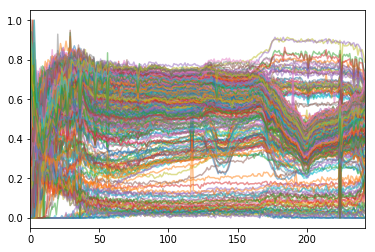

In [335]:
plot(df_frame)

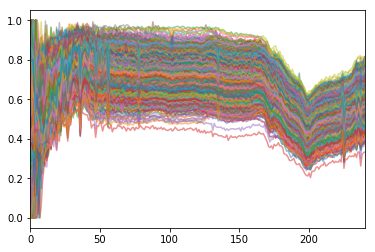

In [336]:
plot(df_back)

# save data

In [323]:
df_back = df_back.iloc[:, 0:-2]
df_back_1000 = df_back.sample(1000).reset_index(drop=True)
df_back_1000['label'] = 0

In [309]:
features = np.load('../TestInMaize/feature4000.npy')
labels = np.load('../TestInMaize/label4000.npy')
df0 = pd.DataFrame(features)
df0['label'] = labels

df_code1 = df0[df0['label']==1]
df_code2 = df0[df0['label']==2]
df_code3 = df0[df0['label']==3]

In [333]:
df_new = pd.concat([df_back_1000, df_code1, df_code2, df_code3])

In [340]:
np.save('maize_back_leaf_stem_tassel_features_4000', df_new.iloc[:,0:-1])

In [341]:
np.save('maize_back_leaf_stem_tassel_labels_4000', df_new.iloc[:,-1])

In [344]:
np.load('maize_back_leaf_stem_tassel_features_4000.npy').shape

(4000, 243)

In [347]:
np.load('maize_back_leaf_stem_tassel_labels_4000.npy').shape

(4000,)